## Problem4

The head of HR of a certain organization wants to automate their salary hike estimation. The organization consulted an analytics service provider and asked them to build a basic prediction model by providing them with a dataset that contains the data about the number of years of experience and the salary hike given accordingly. Build a Simple Linear Regression model with salary as the target variable. Apply necessary transformations and record the RMSE and correlation coefficient values for different models.



In [2]:
# Importing necessary libraries
import pandas as pd # deals with data frame  
import numpy as np  # deals with numerical values

dt = pd.read_csv("Salary_Data.csv")

# Exploratory data analysis:
# 1. Measures of central tendency
# 2. Measures of dispersion
# 3. Third moment business decision
# 4. Fourth moment business decision
# 5. Probability distributions of variables 
# 6. Graphical representations (Histogram, Box plot, Dot plot, Stem & Leaf plot, Bar plot, etc.)

dt.describe()



,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [3]:
dt.shape

(30, 2)

In [4]:
dt.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


<AxesSubplot:xlabel='Salary', ylabel='Density'>

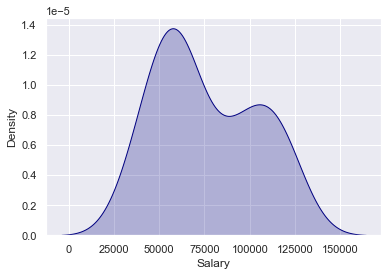

In [5]:
#Graphical Representation
import matplotlib.pyplot as plt # mostly used for visualization purposes
import seaborn as sns
sns.set()

#plt.bar(height = dt['Salary'], x = np.arange(100, 1100, 100))

sns.kdeplot(data=dt,x= dt['Salary'],fill=True,color="navy")

(array([4., 2., 7., 4., 0., 2., 2., 2., 4., 3.]),
 array([ 37731.,  46197.,  54663.,  63129.,  71595.,  80061.,  88527.,
         96993., 105459., 113925., 122391.]),
 <BarContainer object of 10 artists>)

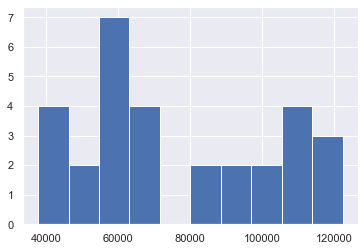

In [6]:
plt.hist(dt['Salary']) #histogram

{'whiskers': [<matplotlib.lines.Line2D at 0x197e08a6a00>,
 'caps': [<matplotlib.lines.Line2D at 0x197e08b60a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x197e08a65b0>],
 'medians': [<matplotlib.lines.Line2D at 0x197e08b67c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x197e08b6b50>],
 'means': []}

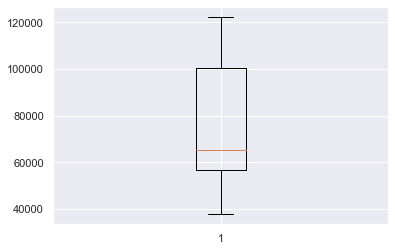

In [7]:
plt.boxplot(dt['Salary']) #boxplot

<AxesSubplot:xlabel='YearsExperience', ylabel='Density'>

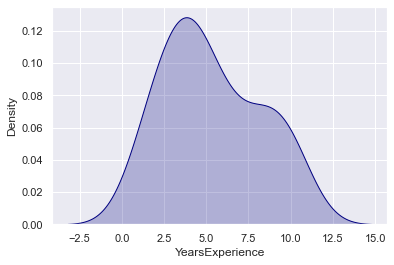

In [8]:
sns.kdeplot(data=dt,x= dt['YearsExperience'],fill=True,color="navy")

(array([4., 2., 5., 4., 3., 2., 2., 2., 3., 3.]),
 array([ 1.1 ,  2.04,  2.98,  3.92,  4.86,  5.8 ,  6.74,  7.68,  8.62,
         9.56, 10.5 ]),
 <BarContainer object of 10 artists>)

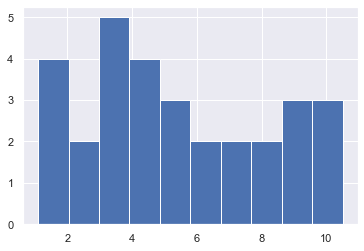

In [9]:
plt.hist(dt['YearsExperience']) #histogram

{'whiskers': [<matplotlib.lines.Line2D at 0x197e09d1310>,
 'caps': [<matplotlib.lines.Line2D at 0x197e09d1a30>,
 'boxes': [<matplotlib.lines.Line2D at 0x197e09c1f10>],
 'medians': [<matplotlib.lines.Line2D at 0x197e09dd190>],
 'fliers': [<matplotlib.lines.Line2D at 0x197e09dd520>],
 'means': []}

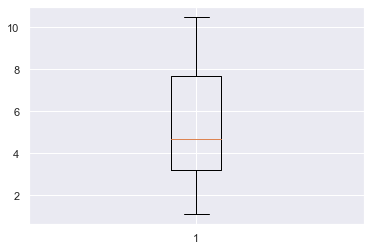

In [10]:
plt.boxplot(dt['YearsExperience']) #boxplot

### Bivariate

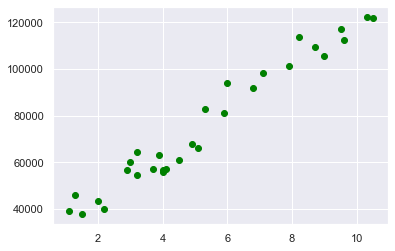

In [11]:
# Scatter plot
plt.scatter(x = dt['YearsExperience'], y = dt['Salary'], color = 'green')


In [12]:
dt.columns

Index(['YearsExperience', 'Salary'], dtype='object')

In [13]:
# correlation
np.corrcoef(dt['Salary'], dt['YearsExperience']) 

array([[1.        , 0.97824162],
       [0.97824162, 1.        ]])

In [14]:
# Covariance
# NumPy does not have a function to calculate the covariance between two variables directly. 
# Function for calculating a covariance matrix called cov() 
# By default, the cov() function will calculate the unbiased or sample covariance between the provided random variables.

cov_output = np.cov(dt['Salary'], dt['YearsExperience'])[0, 1]
cov_output



76106.30344827585

In [15]:
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#dt=scaler.fit_transform(dt)

In [16]:
dt

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [17]:
# dt.cov()


# Import library
import statsmodels.formula.api as smf

# Simple Linear Regression
model = smf.ols('Salary ~ YearsExperience', data = dt).fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Tue, 19 Apr 2022   Prob (F-statistic):           1.14e-20
Time:                        12:42:52   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

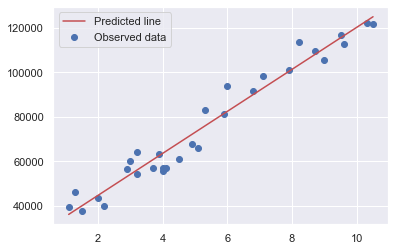

In [18]:
pred1 = model.predict(pd.DataFrame(dt['YearsExperience']))

# Regression Line
plt.scatter(dt.YearsExperience, dt.Salary)
plt.plot(dt.YearsExperience, pred1, "r")
plt.legend(['Predicted line', 'Observed data'])
plt.show()

In [19]:
# Error calculation
res1 = dt.Salary - pred1
res_sqr1 = res1 * res1
mse1 = np.mean(res_sqr1)
rmse1 = np.sqrt(mse1)
rmse1

5592.043608760662

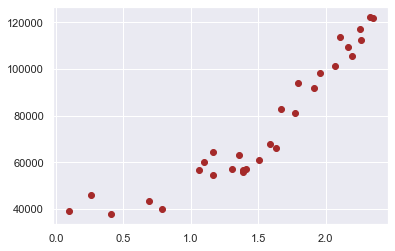

In [20]:
######### Model building on Transformed Data
# Log Transformation
# x = log(waist); y = at

plt.scatter(x = np.log(dt['YearsExperience']), y = dt['Salary'], color = 'brown')

In [21]:
np.corrcoef(np.log(dt.YearsExperience), dt.Salary) #correlation

array([[1.        , 0.92406108],
       [0.92406108, 1.        ]])

In [22]:
model2 = smf.ols('Salary ~ np.log(YearsExperience)', data = dt).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     163.6
Date:                Tue, 19 Apr 2022   Prob (F-statistic):           3.25e-13
Time:                        12:42:53   Log-Likelihood:                -319.77
No. Observations:                  30   AIC:                             643.5
Df Residuals:                      28   BIC:                             646.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                1.493e+04   5156.226      2.895      0.007    4365.921    2.55e+04
np.log(YearsExperience)  4.058e+04   3172.453     12.792      0.000    3.41e+04    4.71e+04
==============================================================================
Omnibus:                        1.094   Durbin-Watson:                   0.512
Prob(Omnibus):                  0.579   Jarque-Bera (JB):                0.908
Skew:                           0.156   Prob(JB):                        0.635
Kurtosis:                       2.207   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

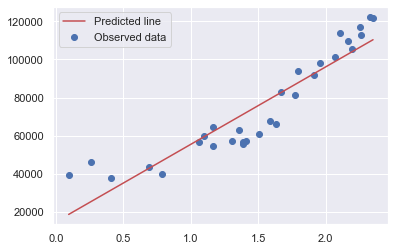

In [23]:
pred2 = model2.predict(pd.DataFrame(dt['YearsExperience']))

# Regression Line
plt.scatter(np.log(dt.YearsExperience), dt.Salary)
plt.plot(np.log(dt.YearsExperience), pred2, "r")
plt.legend(['Predicted line', 'Observed data'])
plt.show()


In [24]:
# Error calculation
res2 = dt.Salary - pred2
res_sqr2 = res2 * res2
mse2 = np.mean(res_sqr2)
rmse2 = np.sqrt(mse2)
rmse2

10302.893706228306

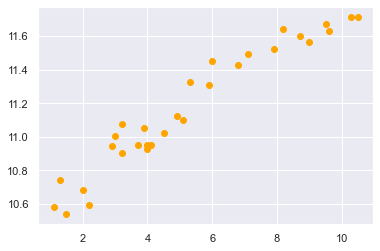

In [25]:
#### Exponential transformation
# x = waist; y = log(at)

plt.scatter(x = dt['YearsExperience'], y = np.log(dt['Salary']), color = 'orange')

In [26]:
np.corrcoef(dt.YearsExperience, np.log(dt.Salary)) #correlation

array([[1.        , 0.96538444],
       [0.96538444, 1.        ]])

In [27]:
model3 = smf.ols('np.log(Salary) ~ YearsExperience', data = dt).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         np.log(Salary)   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     383.6
Date:                Tue, 19 Apr 2022   Prob (F-statistic):           7.03e-18
Time:                        12:42:54   Log-Likelihood:                 28.183
No. Observations:                  30   AIC:                            -52.37
Df Residuals:                      28   BIC:                            -49.56
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          10.5074      0.038    273.327      0.000      10.429      10.586
YearsExperience     0.1255      0.006     19.585      0.000       0.112       0.139
==============================================================================
Omnibus:                        0.826   Durbin-Watson:                   1.438
Prob(Omnibus):                  0.661   Jarque-Bera (JB):                0.812
Skew:                           0.187   Prob(JB):                        0.666
Kurtosis:                       2.286   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
pred3 = model3.predict(pd.DataFrame(dt['YearsExperience']))
pred3_at = np.exp(pred3)
pred3_at

0      41998.957468
1      43066.066794
2      44160.289228
3      47019.029189
4      48213.688474
5      52639.142472
6      53303.675386
7      54658.014935
8      54658.014935
9      58196.330788
10     59674.982903
11     60428.338456
12     60428.338456
13     61191.204604
14     64340.199291
15     67651.246149
16     69370.128712
17     71132.684635
18     76693.630780
19     77661.835040
20     85860.704208
21     89153.725393
22     98565.809591
23    102346.110512
24    108971.540758
25    113150.933364
26    120475.819601
27    121996.743836
28    133194.621344
29    136578.829694
dtype: float64

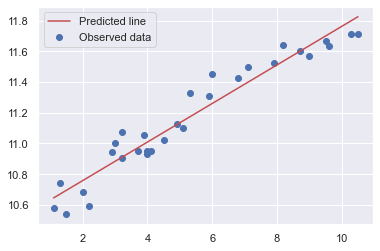

In [29]:
# Regression Line
plt.scatter(dt.YearsExperience, np.log(dt.Salary))
plt.plot(dt.YearsExperience, pred3, "r")
plt.legend(['Predicted line', 'Observed data'])
plt.show()

In [30]:
# Error calculation
res3 = dt.Salary - pred3_at
res_sqr3 = res3 * res3
mse3 = np.mean(res_sqr3)
rmse3 = np.sqrt(mse3)
rmse3

7213.23507662012

In [31]:
#### Polynomial transformation
# x = waist; x^2 = waist*waist; y = log(at)

model4 = smf.ols('np.log(Salary) ~ YearsExperience + I(YearsExperience*YearsExperience)', data = dt).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         np.log(Salary)   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     249.2
Date:                Tue, 19 Apr 2022   Prob (F-statistic):           3.95e-18
Time:                        12:42:54   Log-Likelihood:                 32.391
No. Observations:                  30   AIC:                            -58.78
Df Residuals:                      27   BIC:                            -54.58
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
Intercept                               10.3369      0.067    154.368      0.000      10.199      10.474
YearsExperience                          0.2024      0.027      7.601      0.000       0.148       0.257
I(YearsExperience * YearsExperience)    -0.0066      0.002     -2.957      0.006      -0.011      -0.002
==============================================================================
Omnibus:                        1.099   Durbin-Watson:                   1.845
Prob(Omnibus):                  0.577   Jarque-Bera (JB):                1.002
Skew:                           0.260   Prob(JB):                        0.606
Kurtosis:                       2.271   Cond. No.                         223.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [32]:
pred4 = model4.predict(pd.DataFrame(dt))
pred4_at = np.exp(pred4)
pred4_at

0      38233.559684
1      39686.674746
2      41173.227466
3      45033.440973
4      46633.832589
5      52477.426306
6      53341.747319
7      55091.465477
8      55091.465477
9      59582.917523
10     61423.509899
11     62352.647026
12     62352.647026
13     63287.467325
14     67080.231957
15     70949.981000
16     72909.896294
17     74884.321575
18     80877.084894
19     81883.588147
20     89970.445587
21     93001.652359
22    101003.996109
23    103952.199275
24    108770.218622
25    111590.303652
26    116146.198447
27    117033.009807
28    122976.902760
29    124581.554019
dtype: float64

In [33]:
# Regression line
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)
X = dt.iloc[:, 0:1].values
X_poly = poly_reg.fit_transform(X)
# y = dt.iloc[:, 1].values

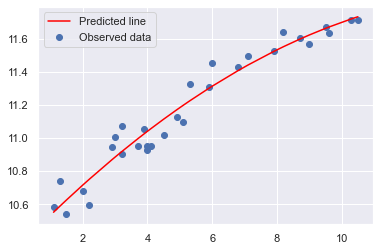

In [34]:
plt.scatter(dt.YearsExperience, np.log(dt.Salary))
plt.plot(X, pred4, color = 'red')
plt.legend(['Predicted line', 'Observed data'])
plt.show()

In [35]:
# Error calculation
res4 = dt.Salary - pred4_at
res_sqr4 = res4 * res4
mse4 = np.mean(res_sqr4)
rmse4 = np.sqrt(mse4)
rmse4

5391.0815826936005

In [36]:
# Choose the best model using RMSE
data = {"MODEL":pd.Series(["SLR", "Log model", "Exp model", "Poly model"]), "RMSE":pd.Series([rmse1, rmse2, rmse3, rmse4])}

table_rmse = pd.DataFrame(data)
table_rmse

,MODEL,RMSE
0,SLR,5592.043609
1,Log model,10302.893706
2,Exp model,7213.235077
3,Poly model,5391.081583


In [42]:
###################
# The best model

from sklearn.model_selection import train_test_split

train, test = train_test_split(dt, test_size = 0.2)

finalmodel = smf.ols('np.log(Salary) ~ YearsExperience + I(YearsExperience*YearsExperience)', data = dt).fit()
finalmodel.summary()
# Simple Linear Regression



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         np.log(Salary)   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     249.2
Date:                Tue, 19 Apr 2022   Prob (F-statistic):           3.95e-18
Time:                        12:44:53   Log-Likelihood:                 32.391
No. Observations:                  30   AIC:                            -58.78
Df Residuals:                      27   BIC:                            -54.58
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
Intercept                               10.3369      0.067    154.368      0.000      10.199      10.474
YearsExperience                          0.2024      0.027      7.601      0.000       0.148       0.257
I(YearsExperience * YearsExperience)    -0.0066      0.002     -2.957      0.006      -0.011      -0.002
==============================================================================
Omnibus:                        1.099   Durbin-Watson:                   1.845
Prob(Omnibus):                  0.577   Jarque-Bera (JB):                1.002
Skew:                           0.260   Prob(JB):                        0.606
Kurtosis:                       2.271   Cond. No.                         223.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [43]:
# Predict on test data
test_pred = finalmodel.predict(pd.DataFrame(test))
test_pred

23    11.551686
26    11.662605
7     10.916750
10    11.025548
5     10.868138
1     10.588771
dtype: float64

In [44]:
# Model Evaluation on Test data
test_res = test.Salary - test_pred
test_sqrs = test_res * test_res
test_mse = np.mean(test_sqrs)
test_rmse = np.sqrt(test_mse)
test_rmse

80548.90912801215

In [45]:
# Prediction on train data
train_pred = finalmodel.predict(pd.DataFrame(train))
train_pred

12    11.040561
21    11.440373
27    11.670211
22    11.522915
28    11.719752
3     10.715161
16    11.196980
0     10.551469
15    11.169730
14    11.113645
19    11.313054
9     10.995124
29    11.732716
20    11.407237
4     10.750082
18    11.300686
13    11.055443
2     10.625544
6     10.884475
8     10.916750
17    11.223700
11    11.040561
25    11.622589
24    11.596993
dtype: float64

In [46]:
# Model Evaluation on train data
train_res = train.Salary -train_pred
train_sqrs = train_res * train_res
train_mse = np.mean(train_sqrs)
train_rmse = np.sqrt(train_mse)
train_rmse



80650.58186395293